## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset - California Dataset


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -1.488931  1.160958 -0.076780  0.591561 -0.764826 -1.146732
1 -1.382739 -0.970355 -0.085415 -0.066578 -0.120013 -1.432354
2 -1.470644 -0.342166 -0.151019  1.393621  1.539219  0.058665
3 -1.131944  0.992973 -0.699570 -1.349180  1.637992 -0.835885
4 -1.106787  0.933046  0.059336 -1.491054  1.463962 -1.189798


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471
0:	learn: 0.9837400	total: 46.6ms	remaining: 46.6s
1:	learn: 0.9728381	total: 47ms	remaining: 23.5s
2:	learn: 0.9624642	total: 47.4ms	remaining: 15.8s
3:	learn: 0.9507199	total: 47.8ms	remaining: 11.9s
4:	learn: 0.9401374	total: 48.2ms	remaining: 9.59s
5:	learn: 0.9308958	total: 48.5ms	remaining: 8.03s
6:	learn: 0.9209161	total: 48.9ms	remaining: 6.93s
7:	learn: 0.9110508	total: 49.3ms	remaining: 6.11s
8:	learn: 0.9025303	total: 49.6ms	remaining: 5.47s
9:	learn: 0.8930788	total: 50ms	remaining: 4.95s
10:	learn: 0.8854903	total: 50.4ms	remaining: 4.53s
11:	learn: 0.8774607	total: 50.8ms	remaining: 4.18s
12:	learn: 0.8675502	total: 51.1ms	remaining: 3.88s
13:	learn: 0.8605000	total: 51.4ms	remaining: 3.62s
14:	learn: 0.8537162	total: 51.8ms	remaining: 3.4s
15:	learn: 0.8455137	total: 52.1ms	remaining: 3.21s
16:	learn: 0.8367202	total: 52.5ms	remaining: 3.03s
17:	learn: 0.8284716	total: 52.9ms	remaining: 2.88s
18:	learn: 0.8220556	total: 53.3ms	remaining: 2.7

202:	learn: 0.1759205	total: 121ms	remaining: 474ms
203:	learn: 0.1747317	total: 121ms	remaining: 473ms
204:	learn: 0.1734027	total: 121ms	remaining: 471ms
205:	learn: 0.1723657	total: 122ms	remaining: 469ms
206:	learn: 0.1711779	total: 122ms	remaining: 468ms
207:	learn: 0.1696182	total: 123ms	remaining: 466ms
208:	learn: 0.1680827	total: 123ms	remaining: 465ms
209:	learn: 0.1666692	total: 123ms	remaining: 464ms
210:	learn: 0.1652010	total: 124ms	remaining: 462ms
211:	learn: 0.1643649	total: 124ms	remaining: 461ms
212:	learn: 0.1634868	total: 124ms	remaining: 459ms
213:	learn: 0.1623333	total: 125ms	remaining: 458ms
214:	learn: 0.1610025	total: 125ms	remaining: 456ms
215:	learn: 0.1599016	total: 125ms	remaining: 455ms
216:	learn: 0.1585879	total: 126ms	remaining: 453ms
217:	learn: 0.1571304	total: 126ms	remaining: 452ms
218:	learn: 0.1556702	total: 126ms	remaining: 451ms
219:	learn: 0.1545455	total: 127ms	remaining: 449ms
220:	learn: 0.1532054	total: 127ms	remaining: 448ms
221:	learn: 

485:	learn: 0.0319923	total: 223ms	remaining: 235ms
486:	learn: 0.0318891	total: 223ms	remaining: 235ms
487:	learn: 0.0317647	total: 223ms	remaining: 234ms
488:	learn: 0.0316645	total: 224ms	remaining: 234ms
489:	learn: 0.0315431	total: 224ms	remaining: 233ms
490:	learn: 0.0312839	total: 224ms	remaining: 233ms
491:	learn: 0.0312352	total: 225ms	remaining: 232ms
492:	learn: 0.0311397	total: 225ms	remaining: 231ms
493:	learn: 0.0310226	total: 225ms	remaining: 231ms
494:	learn: 0.0308101	total: 226ms	remaining: 230ms
495:	learn: 0.0306305	total: 226ms	remaining: 230ms
496:	learn: 0.0303825	total: 227ms	remaining: 229ms
497:	learn: 0.0303158	total: 227ms	remaining: 229ms
498:	learn: 0.0301447	total: 227ms	remaining: 228ms
499:	learn: 0.0300792	total: 228ms	remaining: 228ms
500:	learn: 0.0300149	total: 228ms	remaining: 227ms
501:	learn: 0.0299518	total: 228ms	remaining: 227ms
502:	learn: 0.0297182	total: 229ms	remaining: 226ms
503:	learn: 0.0296095	total: 229ms	remaining: 225ms
504:	learn: 

748:	learn: 0.0105673	total: 324ms	remaining: 108ms
749:	learn: 0.0105414	total: 324ms	remaining: 108ms
750:	learn: 0.0104967	total: 324ms	remaining: 108ms
751:	learn: 0.0104364	total: 325ms	remaining: 107ms
752:	learn: 0.0103928	total: 325ms	remaining: 107ms
753:	learn: 0.0103649	total: 326ms	remaining: 106ms
754:	learn: 0.0103265	total: 326ms	remaining: 106ms
755:	learn: 0.0102809	total: 326ms	remaining: 105ms
756:	learn: 0.0102366	total: 327ms	remaining: 105ms
757:	learn: 0.0102149	total: 327ms	remaining: 104ms
758:	learn: 0.0101965	total: 328ms	remaining: 104ms
759:	learn: 0.0101527	total: 328ms	remaining: 104ms
760:	learn: 0.0101326	total: 328ms	remaining: 103ms
761:	learn: 0.0101129	total: 329ms	remaining: 103ms
762:	learn: 0.0100584	total: 329ms	remaining: 102ms
763:	learn: 0.0100405	total: 329ms	remaining: 102ms
764:	learn: 0.0100014	total: 330ms	remaining: 101ms
765:	learn: 0.0099839	total: 330ms	remaining: 101ms
766:	learn: 0.0099457	total: 331ms	remaining: 100ms
767:	learn: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

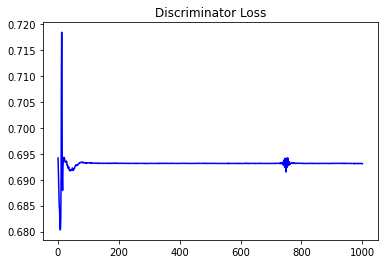

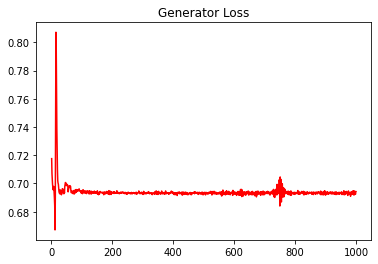

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.1884605116564449


#### Sanity Checks 

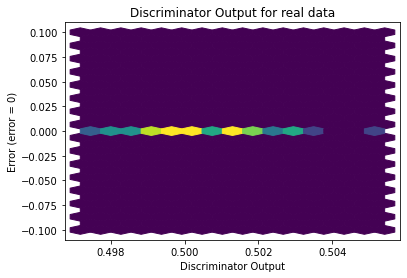

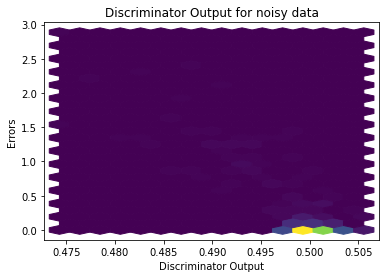

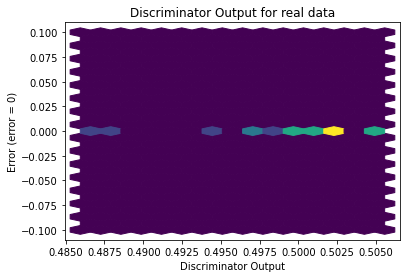

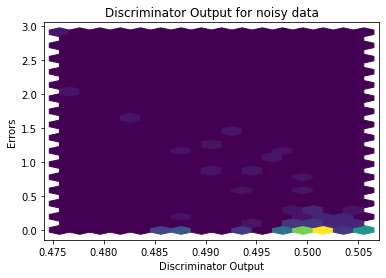

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


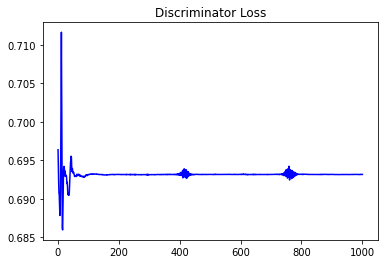

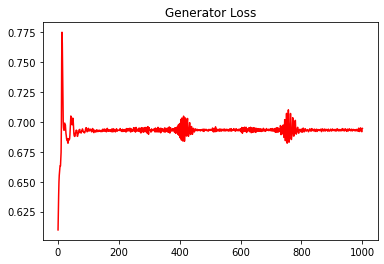

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.21423932882130453


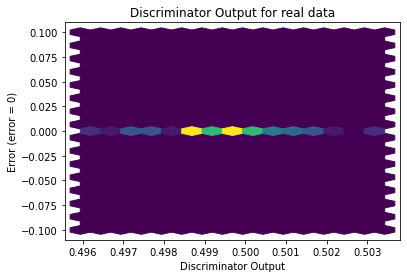

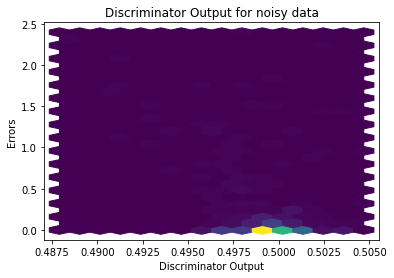

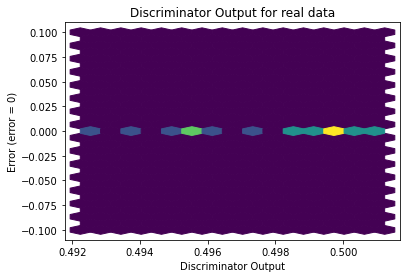

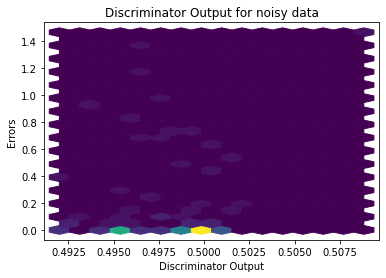

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.4027]], device='cuda:0', requires_grad=True)
